In [16]:
import easyocr
import pytesseract
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [17]:
reader = easyocr.Reader(["en"], gpu=True)

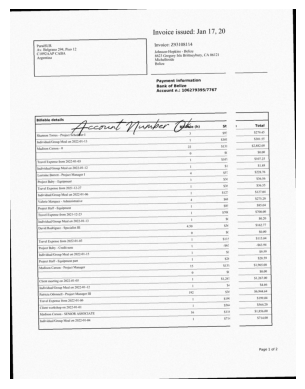

In [18]:

# the same as above but using cv2
image = cv2.imread("/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Z93108114.pdf/0.png")

#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#_, image = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)

#  dispaly
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
image = cv2.imread("/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/Z93108114.pdf/0.png")

d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

n_boxes = len(d['level'])
for i in range(n_boxes):
    if d["conf"][i] < 0:
        continue
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

    bounds = [
        [x, y],
        [x + w, y],
        [x + w, y + h],
        [x, y + h],
    ]
    


    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

cv2.imshow('img', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
results = reader.readtext(image, detail=1, batch_size=40, paragraph=False)
[
    {"bounds": [list(map(int, lst)) for lst in item[0]], "text": item[1], "confidence": item[2]}  # type: ignore
    for item in results
]

[{'bounds': [[434, 56], [662, 56], [662, 82], [434, 82]],
  'text': 'Invoice issued: Jan 17, 20',
  'confidence': 0.7299855600524849},
 {'bounds': [[441, 101], [561, 101], [561, 117], [441, 117]],
  'text': 'Invoice: Z93108114',
  'confidence': 0.5923519565366532},
 {'bounds': [[81, 107], [131, 107], [131, 121], [81, 121]],
  'text': 'FaniSUk',
  'confidence': 0.2106622274275882},
 {'bounds': [[101, 117], [207, 117], [207, 133], [101, 133]],
  'text': 'Belgrano 294, Piso 12',
  'confidence': 0.7330793246117893},
 {'bounds': [[531, 123], [565, 123], [565, 137], [531, 137]],
  'text': 'Belize',
  'confidence': 0.9998768708149639},
 {'bounds': [[440, 124], [644, 124], [644, 153], [440, 153]],
  'text': 'K623sGir-Hory iste Bittneybury CA 06121',
  'confidence': 0.10605325943991524},
 {'bounds': [[442, 126], [480, 126], [480, 134], [442, 134]],
  'text': 'Iohnson',
  'confidence': 0.2598406128368753},
 {'bounds': [[81, 131], [173, 131], [173, 145], [81, 145]],
  'text': 'CIO9ZAAP CABA',
  '

In [1]:
import sys
sys.path.append('..')

from lib.data import load_extracted_samples

samples = load_extracted_samples()
samples = [s for s in samples if len(s["text"]) == 0]

In [ ]:
from lib.ocr import OCRParams, ocr_sample


samples[2], ocr_sample(samples[2], OCRParams(
    engine="tesseract",
    grayscale=True,
    threshold=150
))

In [ ]:
from lib.invoice import find_invoice_cached

find_invoice_cached(samples[200])
samples[200]

In [ ]:
from tqdm import tqdm

not_found = 0
found = 0
no_text = 0
found_set = set()

for sample in tqdm(load_extracted_samples()):
    invoice = find_invoice_cached(sample)
    if invoice is None:
        if len(sample["text"]) > 0:
            not_found += 1
        else:
            no_text += 1
    else:
        found += 1
        found_set.add(invoice)


In [ ]:
found, not_found, no_text, len(found_set)

In [ ]:
from paddleocr import PaddleOCR,draw_ocr

ocr = PaddleOCR(use_angle_cls=False, lang='en', use_gpu=False)

In [ ]:
img_path = "/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/2021-02-02_135.pdf/0.png"
result = ocr.ocr(img_path, cls=False)[0]

In [ ]:
[
    {
        "box": line[0],
        "text": line[1][0],
        "confidence": line[1][1]
    }
    for   
    line
    in
    result
]

In [ ]:
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path="/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf")
im_show = Image.fromarray(im_show)
im_show.save('result.png')

In [2]:
import sys
sys.path.append('..')

from lib.ocr import run_ocr_image,OCRParams,run_ocr_sample



In [ ]:
samples[0]

In [23]:
run_ocr_sample(samples[0], OCRParams(engine="paddleocr"))

In [3]:
a = run_ocr_image("/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/2021-02-02_135.pdf/0.png", params=OCRParams(engine="easyocr"))

Initializing EasyOCR reader...


[2023-07-03 03:17:26,045] [ WARNING] image.py:720 - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


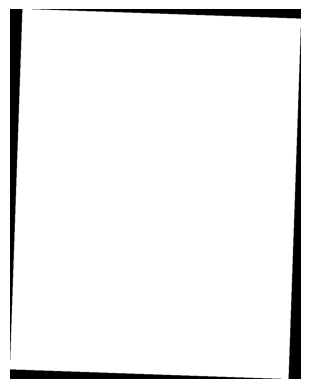

In [73]:
from deskew import determine_skew
from skimage.transform import rotate
from skimage.color import rgb2gray

grayscale = rgb2gray(cv2.imread("/mnt/c/Users/mlomb/Desktop/ParaiSUR/data-extracted/2021-02-03_4873.pdf/0.png"))
angle = determine_skew(grayscale)
rotated = rotate(grayscale, angle, resize=True, preserve_range=True) * 255

plt.axis('off')
plt.imshow(rotated, cmap='gray')
plt.show()

In [72]:
rotated.max()

1.0

In [64]:
@cache.memoize(typed=True, expire=1, tag='fibac')
def fibonacci(number):
    print(f"Calculating fibonacci({number})")
    if number == 0:
        return 0
    elif number == 1:
        return 1
    else:
        return fibonacci(number - 1) + fibonacci(number - 2)
